In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

Using TensorFlow backend.


In [2]:
DATA_DIR = '../pickles'

In [3]:
df = pd.read_pickle(os.path.join(DATA_DIR, 'station1_normalized.pkl'))
df.head(10)

,date,ref,NO2_61FD,NO2_61F0,NO2_61EF,rh,t_grad,pressure,temp,pluvio
0,2017-09-28 10:15:00,38.5,-0.324687,-0.487027,0.433465,0.167023,-1.039505,0.375594,0.898638,0.0
1,2017-09-28 10:30:00,32.3,-0.343192,-0.325877,-0.412283,0.083982,-1.094050,0.375594,0.946776,0.0
2,2017-09-28 10:45:00,38.5,-0.010107,-0.161505,-0.198236,0.065528,-0.984961,0.375594,0.970844,0.0
3,2017-09-28 11:00:00,29.7,-0.386370,-0.554710,-0.339194,-0.063647,-0.984961,0.356064,1.091187,0.0
4,2017-09-28 11:15:00,19.4,-0.386370,-0.422567,-0.412283,-0.146688,-1.203138,0.375594,1.163393,0.0
5,2017-09-28 11:30:00,10.8,-0.386370,-0.619170,-0.412283,-0.238957,-1.039505,0.375594,1.259668,0.0
6,2017-09-28 11:45:00,12.4,-0.386370,-0.586940,-0.412283,-0.358905,-1.203138,0.375594,1.283736,0.0
7,2017-09-28 12:00:00,12.3,-0.386370,-0.619170,-0.412283,-0.405039,-1.148594,0.375594,1.307805,0.0
8,2017-09-28 12:15:00,9.7,-0.386370,-0.619170,-0.412283,-0.423493,-1.312227,0.356064,1.355942,0.0
9,2017-09-28 12:30:00,13.8,-0.386370,-0.619170,-0.412283,-0.552668,-1.475859,0.356064,1.548491,0.0


In [4]:
def from_dataframe_to_xy(df):
    return (np.array(df[['NO2_61FD', 'NO2_61F0', 'NO2_61EF', 'temp', 'rh', 't_grad', 'pressure', 'pluvio']]),
            np.array(df['ref']))


def split_dataframe(dataframe, percent):
    nb_rows = int(np.floor(percent * len(dataframe)))
    return dataframe[:nb_rows], dataframe[nb_rows:]

In [5]:
def mlp(input_shape, loss='mse', optimizer='adam'):
    model = Sequential()

    model.add(Dense(32, input_dim=input_shape, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    opti = Adam(lr=0.0003)
    model.compile(loss=loss, optimizer=opti)
    return model

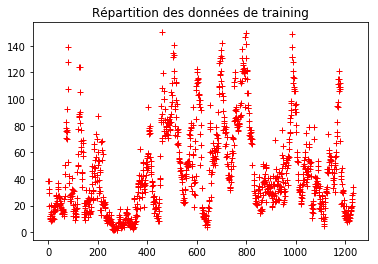

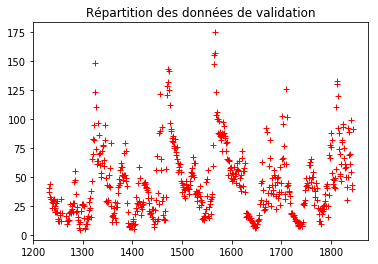

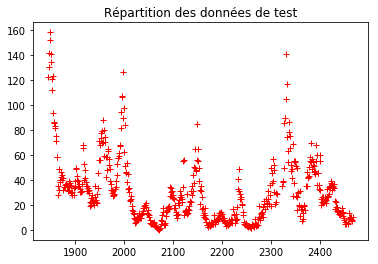

In [6]:
df_train, df_test = split_dataframe(df, 0.5)
df_valid, df_test = split_dataframe(df_test, 0.5)

X_train, y_train = from_dataframe_to_xy(df_train)
X_valid, y_valid = from_dataframe_to_xy(df_valid)
X_test, y_test = from_dataframe_to_xy(df_test)

plt.plot(df_train['ref'], '+r')
plt.title('Répartition des données de training')
plt.show()

plt.plot(df_valid['ref'], '+r')
plt.title('Répartition des données de validation')
plt.show()

plt.plot(df_test['ref'], '+r')
plt.title('Répartition des données de test')
plt.show()

In [7]:
model = mlp(X_train.shape[1])
early_stopping = EarlyStopping(patience=10)
history = model.fit(X_train, y_train, \
                    batch_size=32, \
                    epochs=1000, \
                    validation_data=(X_valid, y_valid), \
                    callbacks=[early_stopping])

Train on 1206 samples, validate on 603 samples
Epoch 1/1000
1206/1206 [==============================] - 0s - loss: 3220.7188 - val_loss: 2811.6698
Epoch 2/1000
1206/1206 [==============================] - 0s - loss: 3214.4842 - val_loss: 2805.6879
Epoch 3/1000
1206/1206 [==============================] - ETA: 0s - loss: 3209.04 - 0s - loss: 3206.1131 - val_loss: 2797.7733
Epoch 4/1000
1206/1206 [==============================] - 0s - loss: 3194.7320 - val_loss: 2787.2961
Epoch 5/1000
1206/1206 [==============================] - 0s - loss: 3179.8875 - val_loss: 2773.6252
Epoch 6/1000
1206/1206 [==============================] - 0s - loss: 3160.8586 - val_loss: 2756.7596
Epoch 7/1000
1206/1206 [==============================] - 0s - loss: 3137.1598 - val_loss: 2735.8929
Epoch 8/1000
1206/1206 [==============================] - 0s - loss: 3108.5690 - val_loss: 2711.3520
Epoch 9/1000
1206/1206 [==============================] - 0s - loss: 3075.5636 - val_loss: 2683.5617
Epoch 10/1000
1206

1206/1206 [==============================] - 0s - loss: 282.9564 - val_loss: 359.5069
Epoch 82/1000
1206/1206 [==============================] - 0s - loss: 278.4820 - val_loss: 354.6673
Epoch 83/1000
1206/1206 [==============================] - 0s - loss: 274.1843 - val_loss: 350.0484
Epoch 84/1000
1206/1206 [==============================] - 0s - loss: 269.9651 - val_loss: 346.5973
Epoch 85/1000
1206/1206 [==============================] - 0s - loss: 265.9269 - val_loss: 342.8861
Epoch 86/1000
1206/1206 [==============================] - 0s - loss: 262.0453 - val_loss: 339.3214
Epoch 87/1000
1206/1206 [==============================] - 0s - loss: 258.2146 - val_loss: 335.7580
Epoch 88/1000
1206/1206 [==============================] - 0s - loss: 254.5647 - val_loss: 331.7496
Epoch 89/1000
1206/1206 [==============================] - 0s - loss: 250.9665 - val_loss: 329.2545
Epoch 90/1000
1206/1206 [==============================] - 0s - loss: 247.4654 - val_loss: 326.2575
Epoch 91/1000


1206/1206 [==============================] - 0s - loss: 124.2020 - val_loss: 176.3521
Epoch 163/1000
1206/1206 [==============================] - 0s - loss: 123.4300 - val_loss: 175.4152
Epoch 164/1000
1206/1206 [==============================] - 0s - loss: 122.7381 - val_loss: 174.0123
Epoch 165/1000
1206/1206 [==============================] - 0s - loss: 122.1056 - val_loss: 172.4416
Epoch 166/1000
1206/1206 [==============================] - 0s - loss: 121.4743 - val_loss: 171.7273
Epoch 167/1000
1206/1206 [==============================] - 0s - loss: 120.7994 - val_loss: 169.7062
Epoch 168/1000
1206/1206 [==============================] - 0s - loss: 120.1839 - val_loss: 168.5407
Epoch 169/1000
1206/1206 [==============================] - 0s - loss: 119.5906 - val_loss: 167.8667
Epoch 170/1000
1206/1206 [==============================] - 0s - loss: 119.0122 - val_loss: 166.2413
Epoch 171/1000
1206/1206 [==============================] - 0s - loss: 118.4596 - val_loss: 165.1294
Epoch

1206/1206 [==============================] - 0s - loss: 97.8478 - val_loss: 121.9990
Epoch 244/1000
1206/1206 [==============================] - 0s - loss: 97.6889 - val_loss: 121.9986
Epoch 245/1000
1206/1206 [==============================] - 0s - loss: 97.5805 - val_loss: 121.9702
Epoch 246/1000
1206/1206 [==============================] - 0s - loss: 97.3370 - val_loss: 121.1151
Epoch 247/1000
1206/1206 [==============================] - 0s - loss: 97.1859 - val_loss: 120.8256
Epoch 248/1000
1206/1206 [==============================] - 0s - loss: 96.9887 - val_loss: 120.7141
Epoch 249/1000
1206/1206 [==============================] - 0s - loss: 96.8492 - val_loss: 120.7001
Epoch 250/1000
1206/1206 [==============================] - 0s - loss: 96.7212 - val_loss: 119.9884
Epoch 251/1000
1206/1206 [==============================] - 0s - loss: 96.5762 - val_loss: 119.5430
Epoch 252/1000
1206/1206 [==============================] - 0s - loss: 96.3657 - val_loss: 118.8502: 97.09
Epoch 25

1206/1206 [==============================] - 0s - loss: 86.9279 - val_loss: 101.1258
Epoch 326/1000
1206/1206 [==============================] - 0s - loss: 86.8259 - val_loss: 100.9589
Epoch 327/1000
1206/1206 [==============================] - 0s - loss: 86.7016 - val_loss: 100.5416
Epoch 328/1000
1206/1206 [==============================] - 0s - loss: 86.5204 - val_loss: 100.4849
Epoch 329/1000
1206/1206 [==============================] - 0s - loss: 86.4396 - val_loss: 99.7947
Epoch 330/1000
1206/1206 [==============================] - 0s - loss: 86.3348 - val_loss: 99.8016
Epoch 331/1000
1206/1206 [==============================] - 0s - loss: 86.1956 - val_loss: 99.6513
Epoch 332/1000
1206/1206 [==============================] - 0s - loss: 86.0839 - val_loss: 99.7321
Epoch 333/1000
1206/1206 [==============================] - 0s - loss: 85.9481 - val_loss: 99.4346
Epoch 334/1000
1206/1206 [==============================] - 0s - loss: 85.8623 - val_loss: 98.9145
Epoch 335/1000
1206/1

1206/1206 [==============================] - 0s - loss: 78.7651 - val_loss: 88.6331
Epoch 408/1000
1206/1206 [==============================] - 0s - loss: 78.6998 - val_loss: 88.5612
Epoch 409/1000
1206/1206 [==============================] - 0s - loss: 78.5791 - val_loss: 88.4068
Epoch 410/1000
1206/1206 [==============================] - 0s - loss: 78.5129 - val_loss: 88.2738
Epoch 411/1000
1206/1206 [==============================] - 0s - loss: 78.4247 - val_loss: 88.1432
Epoch 412/1000
1206/1206 [==============================] - 0s - loss: 78.3418 - val_loss: 87.5001
Epoch 413/1000
1206/1206 [==============================] - 0s - loss: 78.2419 - val_loss: 88.0564
Epoch 414/1000
1206/1206 [==============================] - 0s - loss: 78.1767 - val_loss: 87.8673
Epoch 415/1000
1206/1206 [==============================] - 0s - loss: 78.0608 - val_loss: 87.7020
Epoch 416/1000
1206/1206 [==============================] - 0s - loss: 77.9738 - val_loss: 87.6494
Epoch 417/1000
1206/1206 

1206/1206 [==============================] - 0s - loss: 72.4142 - val_loss: 80.4497
Epoch 490/1000
1206/1206 [==============================] - 0s - loss: 72.3374 - val_loss: 80.5438
Epoch 491/1000
1206/1206 [==============================] - 0s - loss: 72.2435 - val_loss: 80.2407
Epoch 492/1000
1206/1206 [==============================] - 0s - loss: 72.1895 - val_loss: 80.3562
Epoch 493/1000
1206/1206 [==============================] - 0s - loss: 72.1316 - val_loss: 79.9491
Epoch 494/1000
1206/1206 [==============================] - 0s - loss: 72.0629 - val_loss: 80.3202
Epoch 495/1000
1206/1206 [==============================] - 0s - loss: 71.9989 - val_loss: 80.0229
Epoch 496/1000
1206/1206 [==============================] - 0s - loss: 71.9333 - val_loss: 80.2288
Epoch 497/1000
1206/1206 [==============================] - 0s - loss: 71.8347 - val_loss: 79.9399
Epoch 498/1000
1206/1206 [==============================] - 0s - loss: 71.7808 - val_loss: 79.6902
Epoch 499/1000
1206/1206 

1206/1206 [==============================] - 0s - loss: 67.5897 - val_loss: 75.9995
Epoch 572/1000
1206/1206 [==============================] - 0s - loss: 67.5246 - val_loss: 75.7004
Epoch 573/1000
1206/1206 [==============================] - 0s - loss: 67.4958 - val_loss: 76.0462
Epoch 574/1000
1206/1206 [==============================] - 0s - loss: 67.4355 - val_loss: 75.8209
Epoch 575/1000
1206/1206 [==============================] - 0s - loss: 67.3943 - val_loss: 75.7582
Epoch 576/1000
1206/1206 [==============================] - 0s - loss: 67.3594 - val_loss: 75.6586
Epoch 577/1000
1206/1206 [==============================] - 0s - loss: 67.2907 - val_loss: 75.6137
Epoch 578/1000
1206/1206 [==============================] - 0s - loss: 67.2565 - val_loss: 75.7144
Epoch 579/1000
1206/1206 [==============================] - 0s - loss: 67.2085 - val_loss: 75.7298
Epoch 580/1000
1206/1206 [==============================] - 0s - loss: 67.1420 - val_loss: 75.2808
Epoch 581/1000
1206/1206 

In [8]:
model.evaluate(X_test, y_test, verbose=0)

105.47474629989523

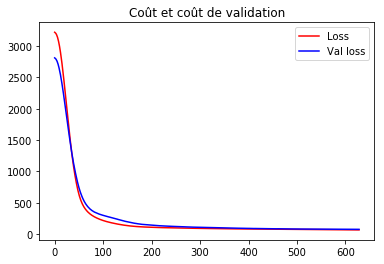

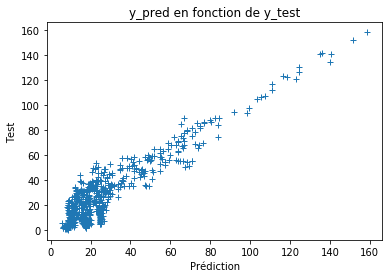

In [9]:
y_pred = model.predict(X_test)
plt.title('Coût et coût de validation')
line1,=plt.plot(history.history['loss'], label="Loss", linestyle='-', color='r')
line2,=plt.plot(history.history['val_loss'], label="Val loss", linestyle='-', color='b')
first_legend = plt.legend(handles=[line1, line2], loc=1)

plt.show()

plt.title('y_pred en fonction de y_test')

plt.plot(y_pred[:], y_test[:], '+')
plt.ylabel('Test')
plt.xlabel('Prédiction')
plt.show()